In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

import numpy as np
from PIL import Image
from jupyter_compare_view import compare

from depth4mc.dataset.D4MCDataset import D4MCDataset
from depth4mc.dataset.dataset_maker.convert_to_dataset import to_depth_far

Jupyter compare_view v0.2.4


In [2]:
### Load Dataset

full_dataset = D4MCDataset(dataset_path='data/', transform=transforms.ToTensor())
train_dataset, test_dataset = random_split(full_dataset, [0.8, 0.2])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [3]:
def do_comp(i):
    for screenshots, labels in train_loader:
        screenshot, label = screenshots[i], labels[i]
        pil_scr = transforms.functional.to_pil_image(screenshot)
        pil_dpt = transforms.functional.to_pil_image(label / to_depth_far(255))
        break
    return compare(pil_scr, pil_dpt, cmap="gray", start_mode="horizontal", start_slider_pos=0.75)


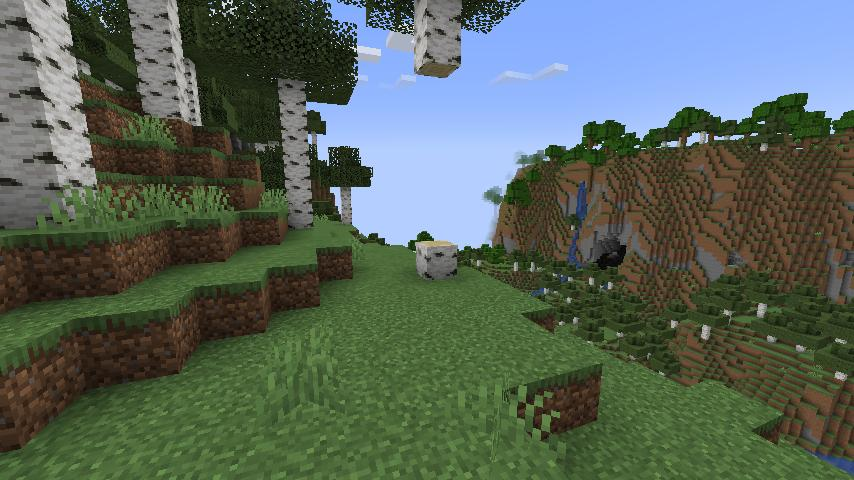
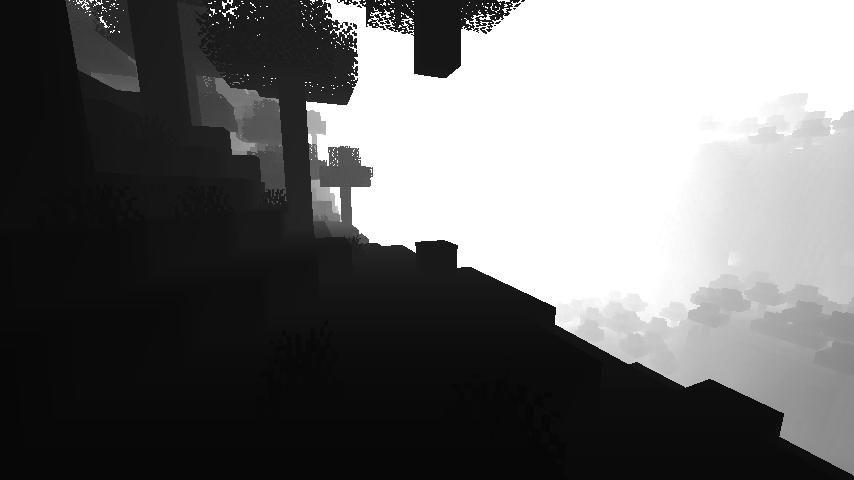

In [4]:
do_comp(0)


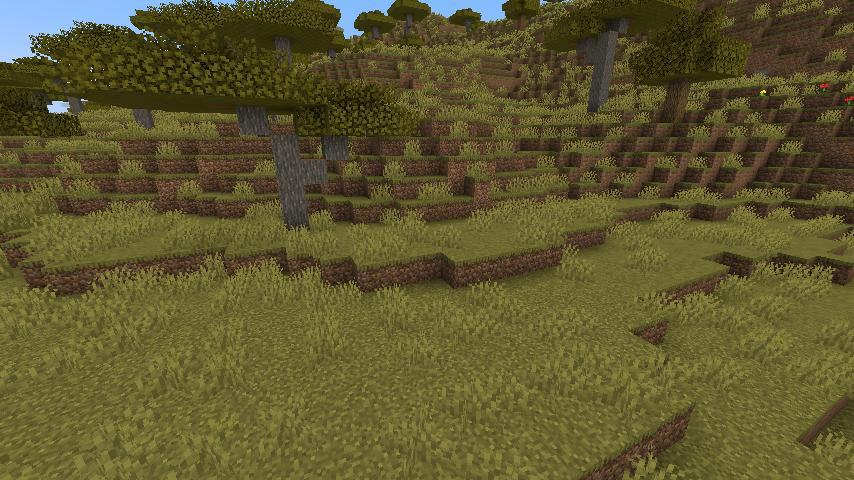
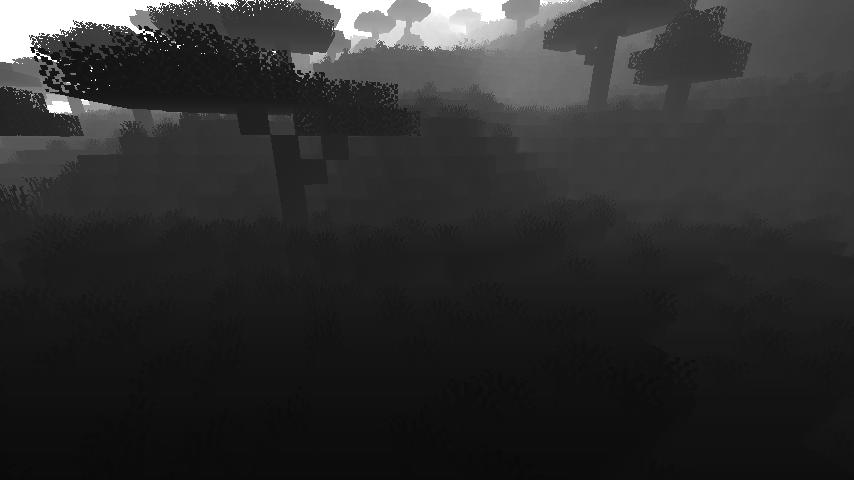

In [5]:
do_comp(1)


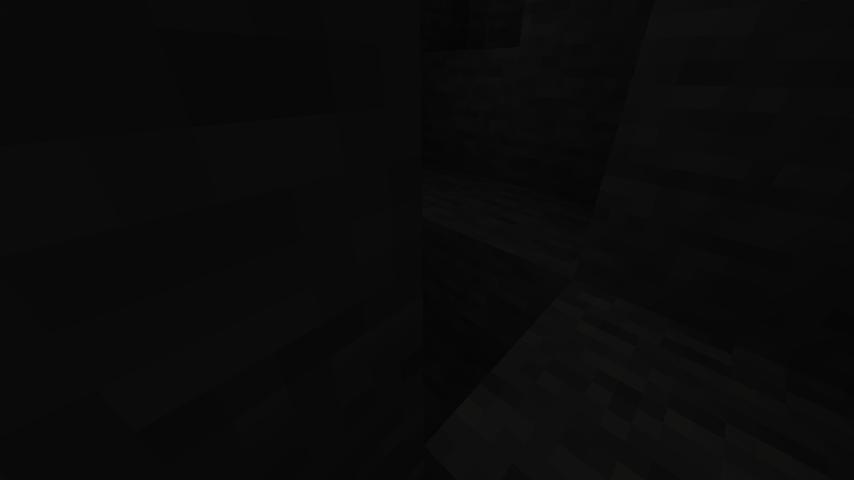
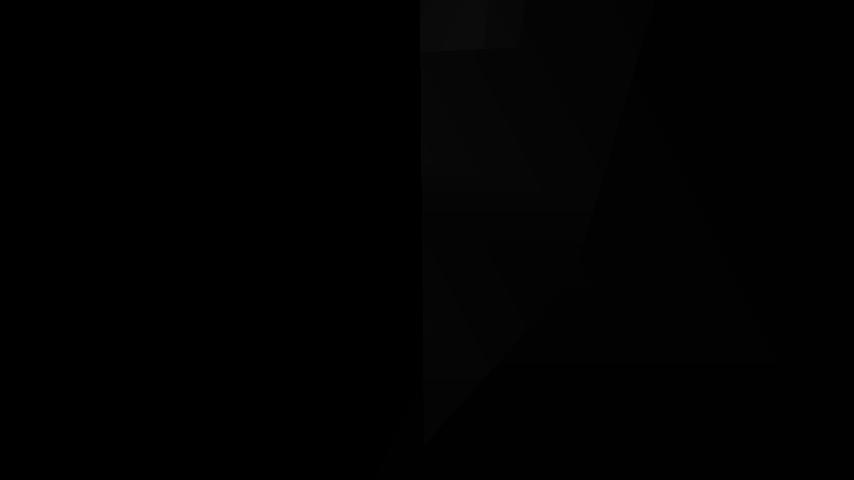

In [6]:
do_comp(2)


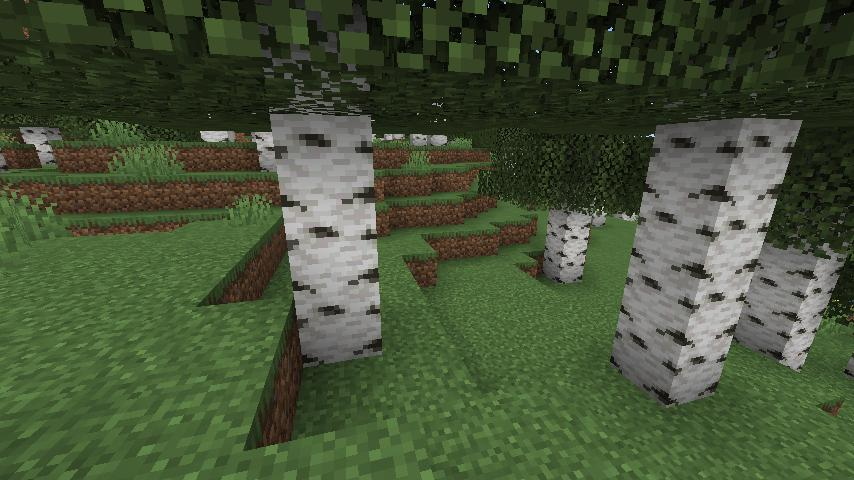
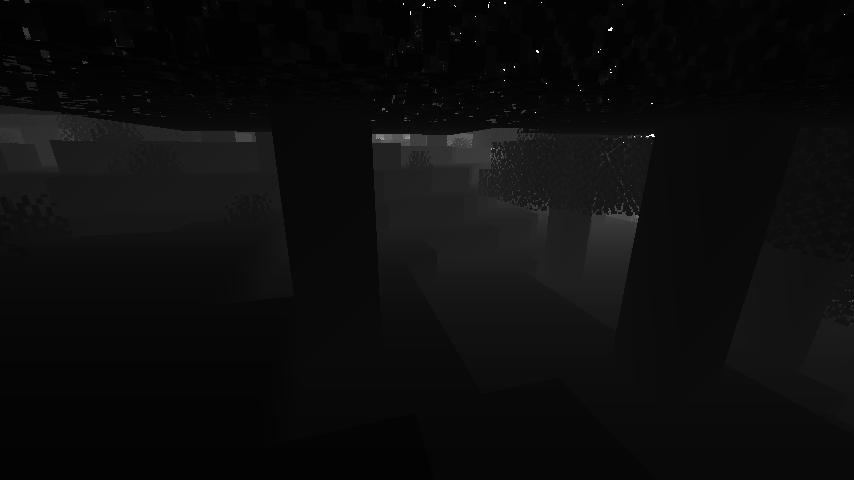

In [7]:
do_comp(3)